In [1]:
# install seurat
# remotes::install_github("satijalab/seurat", ref = "release/4.0.0")

# load required libararies
library(Seurat) # scRNAseq analysis toolset
suppressPackageStartupMessages(library(dplyr)) # data manipulation
library(patchwork) # data visualization in grids

Attaching SeuratObject

Attaching sp



In [2]:
library(dendextend)
library(tidyverse) # metapackage of all tidyverse packages
library(factoextra)
library(NbClust)
#install.packages("arules")
library(arules)
#install.packages("arulesViz")
library(arulesViz)
#install.packages("tidyverse")
#library(tidyverse)
#install.packages("readxml")
library(readxl)
#install.packages("knitr")
library(knitr)
library(ggplot2)
#install.packages("lubridate")
library(lubridate)
#install.packages("plyr")
library(plyr)
library(dplyr)


---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v stringr 1.4.0
v tidyr   1.2.0     v forcats 0.5.1
v readr   2.1.2     

-- Conflicts -------------------------------------------------

In [3]:
setwd('D:/Research/cellTypeSpecificAssociations_v2/Data/E-GEOD-130148/')

In [4]:
data <- ReadMtx(mtx="E-GEOD-130148.aggregated_filtered_normalised_counts.mtx", features="E-GEOD-130148.aggregated_filtered_normalised_counts.mtx_rows",cells="E-GEOD-130148.aggregated_filtered_normalised_counts.mtx_cols")

In [5]:
EGEOD130148 <- CreateSeuratObject(counts=data)

In [6]:
EGEOD130148

An object of class Seurat 
19206 features across 3566 samples within 1 assay 
Active assay: RNA (19206 features, 0 variable features)

In [7]:
all.genes <- rownames(EGEOD130148)
EGEOD130148 <- ScaleData(EGEOD130148, features = all.genes)

Centering and scaling data matrix



In [8]:
head(EGEOD130148[['RNA']]@scale.data)

,SRR8942433-AAAACGAATTCT,SRR8942433-AAAATAATCTGT,SRR8942433-AAAGACTGTCAA,SRR8942433-AAAGCGGATCGC,SRR8942433-AAAGGGCGATGG,SRR8942433-AAAGGGTAGATC,SRR8942433-AAATACCAATAA,SRR8942433-AAATCACCTTCA,SRR8942433-AAATGGCTTGGT,SRR8942433-AAATGTGCCACA,⋯,SRR8942436-TTGTGAAATTCA,SRR8942436-TTTAAGCCCGAT,SRR8942436-TTTAGCCATTGC,SRR8942436-TTTATAGTGCCT,SRR8942436-TTTGAGCACGAA,SRR8942436-TTTTAGCGCTCA,SRR8942436-TTTTCTACCCTA,SRR8942436-TTTTGTAATATA,SRR8942436-TTTTTCGCGCGG,SRR8942436-TTTTTGGAGCCC
ENSG00000000003,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,⋯,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981
ENSG00000000419,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,⋯,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623
ENSG00000000457,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,⋯,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318
ENSG00000000460,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,⋯,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979
ENSG00000000938,0.89363649,-0.27728867,-0.27728867,1.17573760,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,⋯,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,5.64818954,-0.27728867,-0.27728867,-0.27728867
ENSG00000000971,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,⋯,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271


In [9]:
labels <- read.table('ExpDesign-E-GEOD-130148.tsv', sep = '\t', header = TRUE)

In [10]:
head(labels)

,Assay,Sample.Characteristic.organism.,Sample.Characteristic.Ontology.Term.organism.,Sample.Characteristic.individual.,Sample.Characteristic.Ontology.Term.individual.,Sample.Characteristic.age.,Sample.Characteristic.Ontology.Term.age.,Sample.Characteristic.sex.,Sample.Characteristic.Ontology.Term.sex.,Sample.Characteristic.organism.part.,⋯,Sample.Characteristic.clinical.information.,Sample.Characteristic.Ontology.Term.clinical.information.,Factor.Value.sampling.site.,Factor.Value.Ontology.Term.sampling.site.,Factor.Value.disease.,Factor.Value.Ontology.Term.disease.,Factor.Value.clinical.information.,Factor.Value.Ontology.Term.clinical.information.,Factor.Value.inferred.cell.type...ontology.labels.,Factor.Value.Ontology.Term.inferred.cell.type...ontology.labels.
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,SRR8942433-AAAACGAATTCT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NA,62 year,NA,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,⋯,smoker; over 100 per year,NA,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NA,lung macrophage,http://purl.obolibrary.org/obo/CL_1001603
2,SRR8942433-AAAATAATCTGT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NA,62 year,NA,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,⋯,smoker; over 100 per year,NA,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NA,type II pneumocyte,http://purl.obolibrary.org/obo/CL_0002063
3,SRR8942433-AAAGACTGTCAA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NA,62 year,NA,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,⋯,smoker; over 100 per year,NA,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NA,type II pneumocyte,http://purl.obolibrary.org/obo/CL_0002063
4,SRR8942433-AAAGCGGATCGC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NA,62 year,NA,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,⋯,smoker; over 100 per year,NA,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NA,lung macrophage,http://purl.obolibrary.org/obo/CL_1001603
5,SRR8942433-AAAGGGCGATGG,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NA,62 year,NA,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,⋯,smoker; over 100 per year,NA,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NA,lung macrophage,http://purl.obolibrary.org/obo/CL_1001603
6,SRR8942433-AAAGGGTAGATC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NA,62 year,NA,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,⋯,smoker; over 100 per year,NA,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NA,T cell,http://purl.obolibrary.org/obo/CL_0000084


In [11]:
class <- labels[c(1,26)]

In [12]:
colnames(class) <- c("Assay","Label")

In [13]:
head(class)

,Assay,Label
,<chr>,<chr>
1,SRR8942433-AAAACGAATTCT,lung macrophage
2,SRR8942433-AAAATAATCTGT,type II pneumocyte
3,SRR8942433-AAAGACTGTCAA,type II pneumocyte
4,SRR8942433-AAAGCGGATCGC,lung macrophage
5,SRR8942433-AAAGGGCGATGG,lung macrophage
6,SRR8942433-AAAGGGTAGATC,T cell


In [14]:
unlabelled_assays <- class[(is.na(class$Label) | class$Label==""),]

In [15]:
#unclassified <-subset(labels, labels$Labels=="") 

In [16]:
dim(unlabelled_assays)

[1] 364   2

In [17]:
unlabelled_ind <- which(colnames(EGEOD130148[['RNA']]@scale.data) %in% unlabelled_assays$Assay)

In [18]:
unlabelled_data <- EGEOD130148[['RNA']]@scale.data[,unlabelled_ind]

In [19]:
head(unlabelled_data)

,SRR8942433-AACCATGAATTG,SRR8942433-AAGCTATTAGTG,SRR8942433-AAGTACGTCTCG,SRR8942433-ACACCATCCATT,SRR8942433-ACACCGTAAGCT,SRR8942433-ACAGATCGGAAC,SRR8942433-ACCTTCATACGC,SRR8942433-ACTGCGCAAGAA,SRR8942433-ACTTGTCGACTG,SRR8942433-AGAACACTTTGA,⋯,SRR8942436-TGGATTTGCGCA,SRR8942436-TGGTCGCATACT,SRR8942436-TGTCTAGACCAA,SRR8942436-TTAATGCACGGT,SRR8942436-TTATCGCCAAGA,SRR8942436-TTCCCTAGACTT,SRR8942436-TTCCGCGCTACT,SRR8942436-TTCGGTGACAAA,SRR8942436-TTCGTTGGAAAG,SRR8942436-TTGTGAAATTCA
ENSG00000000003,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,⋯,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981,-0.14005981
ENSG00000000419,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,⋯,-0.27053623,-0.27053623,-0.27053623,-0.27053623,-0.27053623,2.11929732,-0.27053623,-0.27053623,-0.27053623,-0.27053623
ENSG00000000457,5.74194419,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,⋯,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318,-0.11277318
ENSG00000000460,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,⋯,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979,-0.06606979
ENSG00000000938,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,⋯,-0.27728867,-0.27728867,-0.27728867,-0.27728867,-0.27728867,1.72335661,-0.27728867,2.70563739,-0.27728867,-0.27728867
ENSG00000000971,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,⋯,-0.24689271,-0.24689271,-0.24689271,-0.24689271,-0.24689271,0.41178427,-0.24689271,-0.24689271,-0.24689271,-0.24689271


In [20]:
EGEOD130148[['RNA']]@scale.data <- unlabelled_data

# Extracting expression matrix for the unlabelled cluster

Analysing cell-cluster specific associations

In [21]:
data <- as.matrix(GetAssayData(EGEOD130148, slot = "scale.data"))

In [22]:
data <- t(data)

In [23]:
head(data)

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,⋯,ENSG00000289565,ENSG00000289604,ENSG00000289685,ENSG00000289690,ENSG00000289692,ENSG00000289694,ENSG00000289695,ENSG00000289697,ENSG00000289700,ENSG00000289701
SRR8942433-AACCATGAATTG,-0.1400598,-0.2705362,5.7419442,-0.06606979,-0.2772887,-0.2468927,-0.2340719,-0.122543,-0.08873032,-0.1210396,⋯,-0.174401,-0.143309,-0.3023073,-0.1240765,-0.07545242,-0.5441603,-0.05930321,-0.1559468,-0.08006949,-0.1260688
SRR8942433-AAGCTATTAGTG,-0.1400598,-0.2705362,-0.1127732,-0.06606979,-0.2772887,-0.2468927,-0.2340719,-0.122543,-0.08873032,-0.1210396,⋯,-0.174401,-0.143309,4.0381273,-0.1240765,-0.07545242,0.4939719,-0.05930321,-0.1559468,-0.08006949,-0.1260688
SRR8942433-AAGTACGTCTCG,-0.1400598,-0.2705362,-0.1127732,-0.06606979,-0.2772887,-0.2468927,-0.2340719,-0.122543,-0.08873032,-0.1210396,⋯,-0.174401,-0.143309,2.3071864,-0.1240765,-0.07545242,1.9523633,-0.05930321,-0.1559468,-0.08006949,-0.1260688
SRR8942433-ACACCATCCATT,-0.1400598,-0.2705362,-0.1127732,-0.06606979,-0.2772887,-0.2468927,-0.2340719,-0.122543,-0.08873032,-0.1210396,⋯,-0.174401,-0.143309,-0.3023073,-0.1240765,6.81791825,0.5929845,-0.05930321,-0.1559468,-0.08006949,-0.1260688
SRR8942433-ACACCGTAAGCT,-0.1400598,-0.2705362,-0.1127732,-0.06606979,-0.2772887,-0.2468927,-0.2340719,-0.122543,-0.08873032,-0.1210396,⋯,-0.174401,7.366491,-0.3023073,-0.1240765,-0.07545242,-0.5441603,-0.05930321,-0.1559468,-0.08006949,-0.1260688
SRR8942433-ACAGATCGGAAC,-0.1400598,-0.2705362,-0.1127732,-0.06606979,-0.2772887,-0.2468927,-0.2340719,-0.122543,-0.08873032,-0.1210396,⋯,-0.174401,-0.143309,0.9349257,-0.1240765,-0.07545242,-0.5441603,-0.05930321,-0.1559468,-0.08006949,-0.1260688


Building transactional dataset

In [24]:
data <- ifelse(data <= -1, -1, ifelse(data >= 1, 1, 0))
data <- ifelse(data == 0, 0, 1)

In [25]:
head(data)

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,⋯,ENSG00000289565,ENSG00000289604,ENSG00000289685,ENSG00000289690,ENSG00000289692,ENSG00000289694,ENSG00000289695,ENSG00000289697,ENSG00000289700,ENSG00000289701
SRR8942433-AACCATGAATTG,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SRR8942433-AAGCTATTAGTG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
SRR8942433-AAGTACGTCTCG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
SRR8942433-ACACCATCCATT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
SRR8942433-ACACCGTAAGCT,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
SRR8942433-ACAGATCGGAAC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [26]:
freq<-table(unlist(data))
freq


      0       1 
6755965  235019 

In [27]:
trans <- as(data, "transactions")
trans

transactions in sparse format with
 364 transactions (rows) and
 19206 items (columns)

In [28]:
summary(trans)

transactions as itemMatrix in sparse format with
 364 rows (elements/itemsets/transactions) and
 19206 columns (items) and a density of 0.03361744 

most frequent items:
ENSG00000122852 ENSG00000131400 ENSG00000185303 ENSG00000116251 ENSG00000168878 
            160             146             144             142             142 
        (Other) 
         234285 

element (itemset/transaction) length distribution:
sizes
 124  238  239  242  274  309  315  332  344  378  380  407  408  417  420  423 
   1    1    1    1    1    1    1    1    1    1    1    2    1    1    2    1 
 429  430  433  434  435  440  441  446  447  448  449  450  451  452  455  457 
   1    2    2    1    1    1    1    2    1    1    1    2    2    2    3    1 
 460  462  464  466  467  470  471  472  474  476  478  479  480  482  485  486 
   2    2    1    1    2    1    2    1    1    1    2    4    2    3    1    2 
 487  488  489  493  494  495  496  498  499  504  505  506  507  508  509  511 
   1    2

Item frequency (absolute) plot for the top 20 items

Loading required package: RColorBrewer



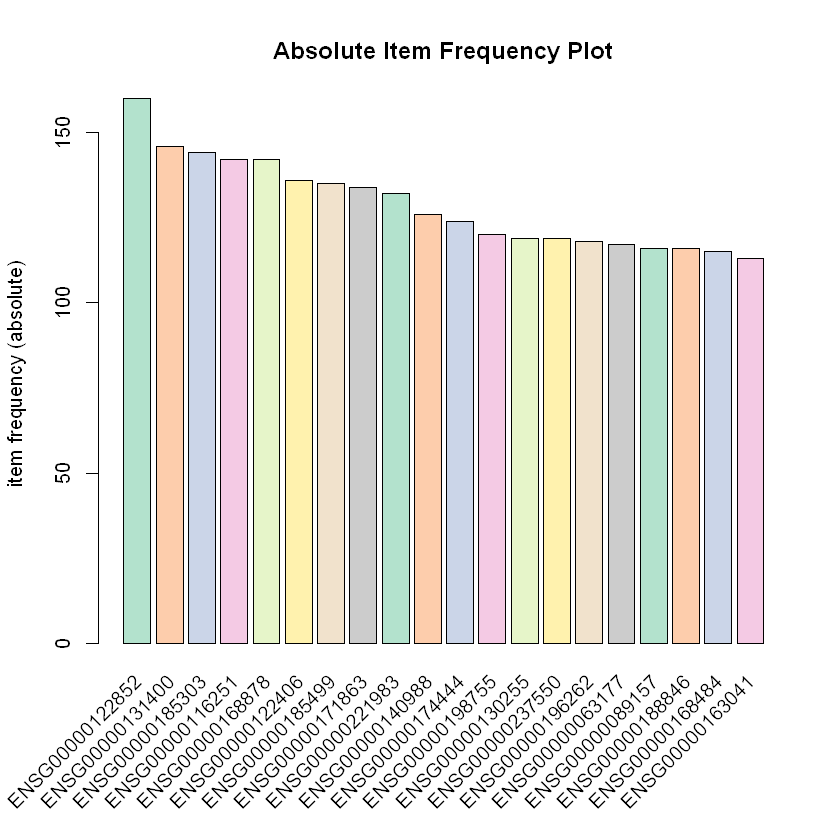

In [29]:
if (!require("RColorBrewer")) {
  # install color package of R
install.packages("RColorBrewer")
#include library RColorBrewer
library(RColorBrewer)
}
itemFrequencyPlot(trans,topN=20,type="absolute",col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")

Item frequency (relative) plot for the top 20 items

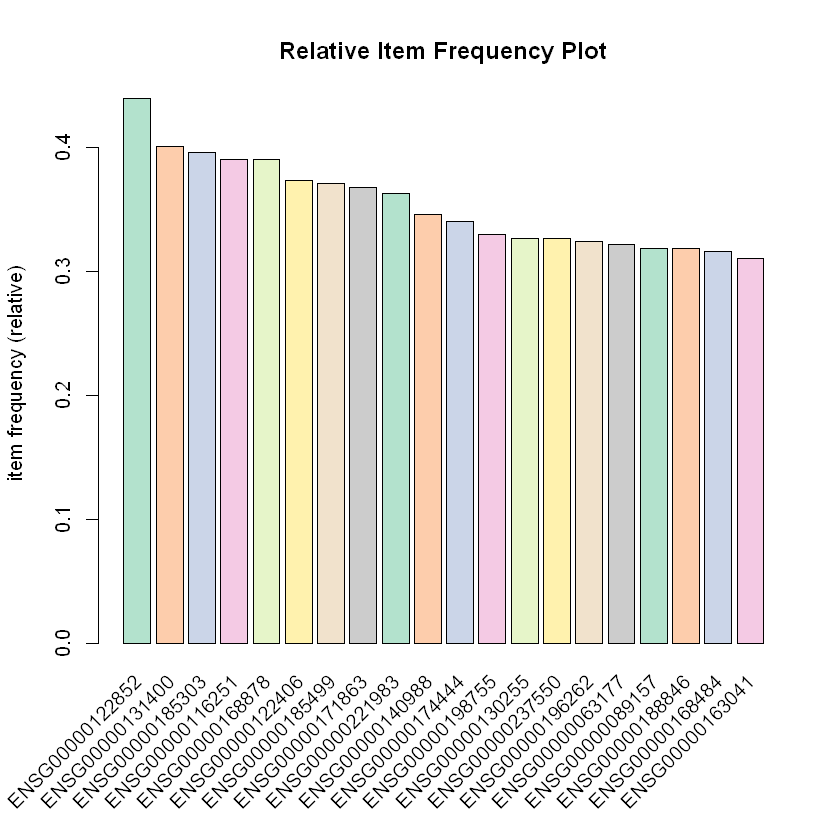

In [30]:
itemFrequencyPlot(trans,topN=20,type="relative",col=brewer.pal(8,'Pastel2'), main="Relative Item Frequency Plot")

# Association Rule Mining

Creating rules using Apriori (Min. relative support = 0.5, Min. Confidence = 0.8)

In [31]:
#Relative support = 0.1-0.5
#Relative confidence = 0.8
association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.09s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [875 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
summary(association.rules)

set of 875 rules

rule length distribution (lhs + rhs):sizes
  2   3   4   5   6 
122 405 275  67   6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.349   4.000   6.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.1016   Min.   :0.8000   Min.   :0.1016   Min.   :1.820  
 1st Qu.:0.1071   1st Qu.:0.8596   1st Qu.:0.1154   1st Qu.:2.112  
 Median :0.1154   Median :0.9091   Median :0.1264   Median :2.401  
 Mean   :0.1204   Mean   :0.9107   Mean   :0.1330   Mean   :4.190  
 3rd Qu.:0.1264   3rd Qu.:0.9744   3rd Qu.:0.1401   3rd Qu.:6.945  
 Max.   :0.3516   Max.   :1.0000   Max.   :0.4396   Max.   :9.579  
     count       
 Min.   : 37.00  
 1st Qu.: 39.00  
 Median : 42.00  
 Mean   : 43.82  
 3rd Qu.: 46.00  
 Max.   :128.00  

mining info:
  data ntransactions support confidence
 trans           364     0.1        0.8
                                                                        

In [33]:
inspect(association.rules[1:20])

     lhs                  rhs               support   confidence coverage 
[1]  {ENSG00000235941} => {ENSG00000237724} 0.1043956 1.0000000  0.1043956
[2]  {ENSG00000237724} => {ENSG00000235941} 0.1043956 0.9500000  0.1098901
[3]  {ENSG00000270672} => {ENSG00000282017} 0.1098901 1.0000000  0.1098901
[4]  {ENSG00000282017} => {ENSG00000270672} 0.1098901 1.0000000  0.1098901
[5]  {ENSG00000206208} => {ENSG00000231925} 0.1071429 0.9512195  0.1126374
[6]  {ENSG00000231925} => {ENSG00000206208} 0.1071429 0.9069767  0.1181319
[7]  {ENSG00000275903} => {ENSG00000277791} 0.1153846 0.9130435  0.1263736
[8]  {ENSG00000277791} => {ENSG00000275903} 0.1153846 0.8571429  0.1346154
[9]  {ENSG00000273559} => {ENSG00000276761} 0.1043956 0.9743590  0.1071429
[10] {ENSG00000276761} => {ENSG00000273559} 0.1043956 0.8260870  0.1263736
[11] {ENSG00000236625} => {ENSG00000244731} 0.1181319 1.0000000  0.1181319
[12] {ENSG00000236625} => {ENSG00000224389} 0.1181319 1.0000000  0.1181319
[13] {ENSG00000236625} =>

Removing redundant rules

In [34]:
subset.rules <- which(colSums(is.subset(association.rules, association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 766

In [35]:
if (length(subset.rules) > 0)
{
    subRules <- association.rules[-subset.rules] # remove subset rules
    print(subRules)
} else
{
    subRules <- association.rules
    print("No redundant rule")
}

set of 109 rules 


In [36]:
#mean.lift <- mean(quality(subset.association.rules)$lift)
#subRules<-association.rules[quality(subset.association.rules)$lift>mean.lift]

Filtering rules by lift

In [37]:
#A lift ratio larger than 1.0 implies that the relationship between 
#the antecedent and the consequent is more significant than would be 
#expected if the two sets were independent.
filteredRules <- subRules[quality(subRules)$lift > 1]
filteredRules

set of 109 rules 

In [38]:
#Sorting rules by lift
sortedRules <- sort(filteredRules, by = "lift")

In [39]:
print(paste("median lift = ",median(quality(association.rules)$lift)))
print(paste("max lift = ",max(quality(association.rules)$lift)))

[1] "median lift =  2.40138888888889"
[1] "max lift =  9.57894736842105"


Plotting sortedSubRules

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



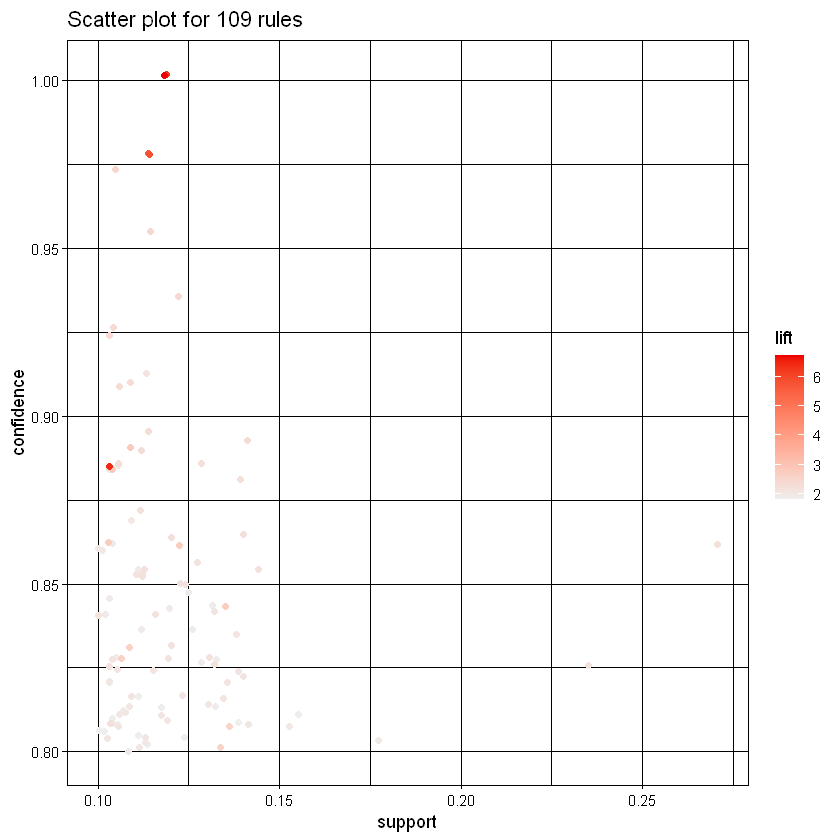

In [40]:
plot(sortedRules)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



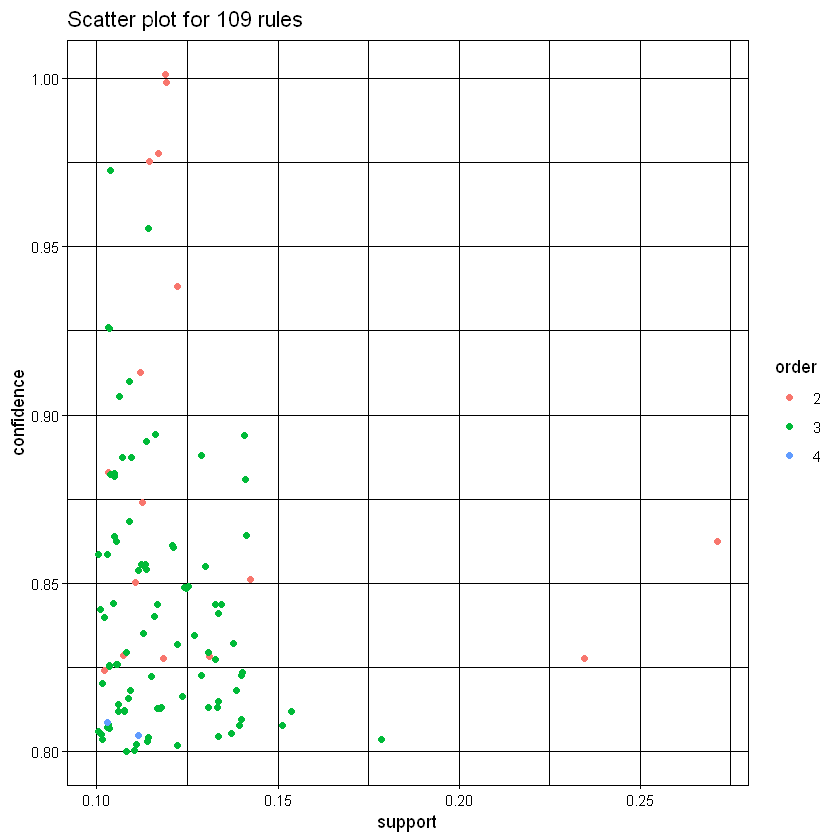

In [41]:
plot(sortedRules,method="two-key plot")

In [42]:
top100Rules <- head(sortedRules, n = 100, by = "confidence")

In [43]:
inspect(top100Rules)

      lhs                   rhs                 support confidence  coverage     lift count
[1]   {ENSG00000236625}  => {ENSG00000244731} 0.1181319  1.0000000 0.1181319 6.740741    43
[2]   {ENSG00000236625}  => {ENSG00000224389} 0.1181319  1.0000000 0.1181319 6.275862    43
[3]   {ENSG00000236625}  => {ENSG00000206340} 0.1153846  0.9767442 0.1181319 5.828441    42
[4]   {ENSG00000236625}  => {ENSG00000228267} 0.1153846  0.9767442 0.1181319 5.734434    42
[5]   {ENSG00000103811,                                                                    
       ENSG00000119655}  => {ENSG00000168878} 0.1043956  0.9743590 0.1071429 2.497653    38
[6]   {ENSG00000069122,                                                                    
       ENSG00000103811}  => {ENSG00000168878} 0.1153846  0.9545455 0.1208791 2.446863    42
[7]   {ENSG00000224246}  => {ENSG00000168878} 0.1208791  0.9361702 0.1291209 2.399760    44
[8]   {ENSG00000124107,                                                         

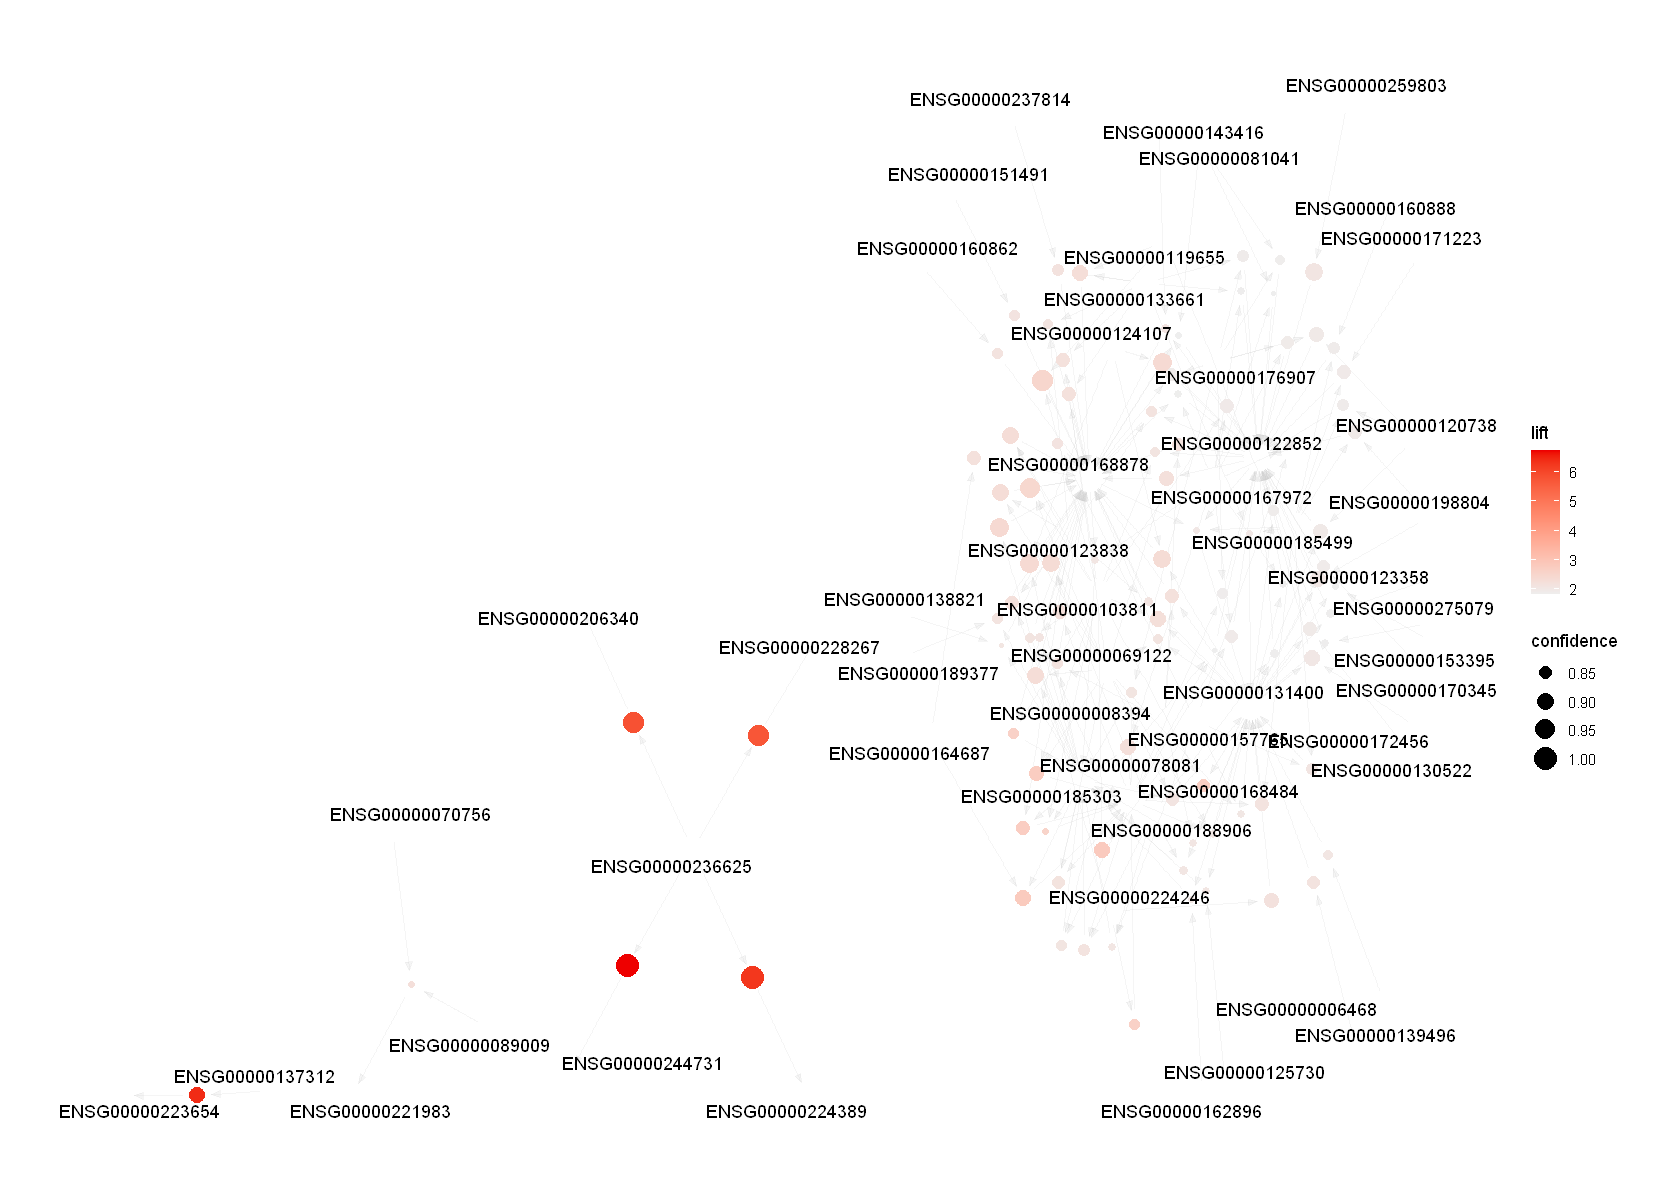

In [44]:
options(repr.plot.width = 14, repr.plot.height = 10)
plot(top100Rules, method = "graph", measure = "confidence", shading="lift")

Exporting top rules in GraphML format to be explored in Gephi

In [45]:
plot(top100Rules, method = "graph",  engine = "htmlwidget")

HTML widgets cannot be represented in plain text (need html)

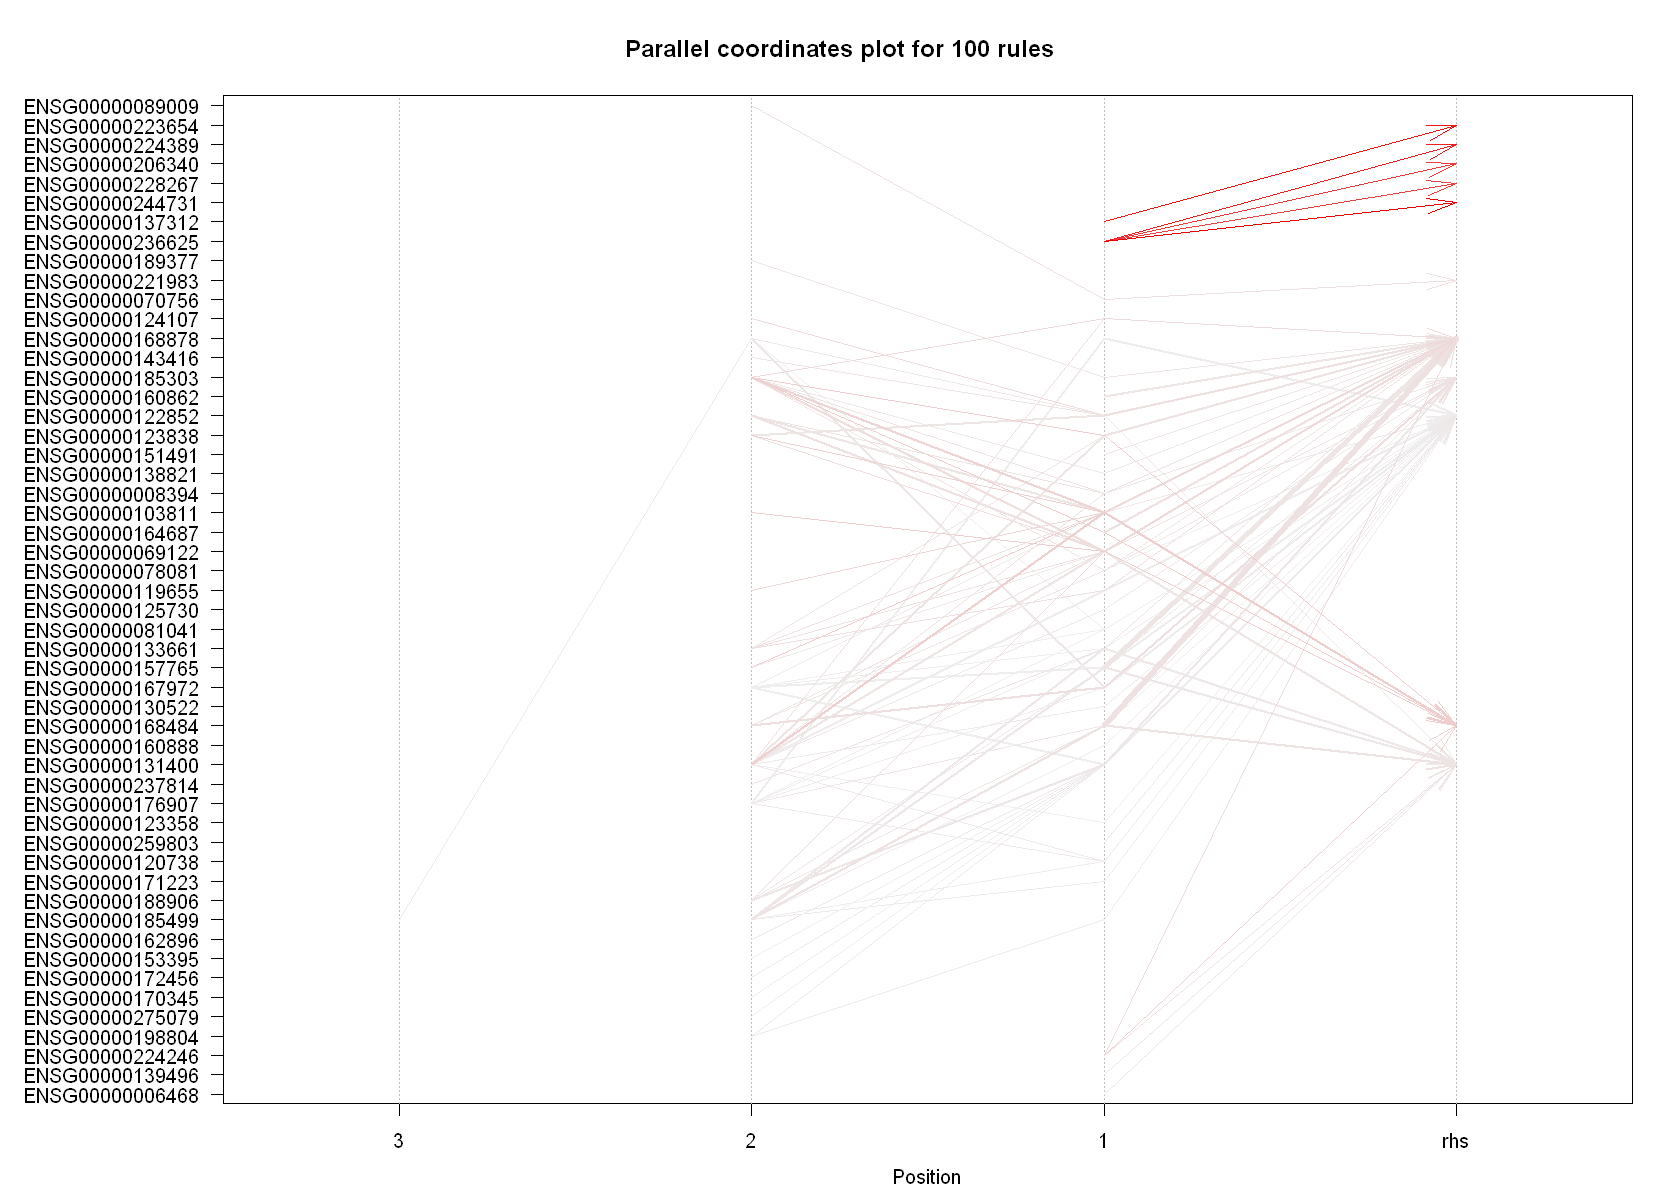

In [46]:
plot(top100Rules, method="paracoord", control=list(reorder=TRUE))

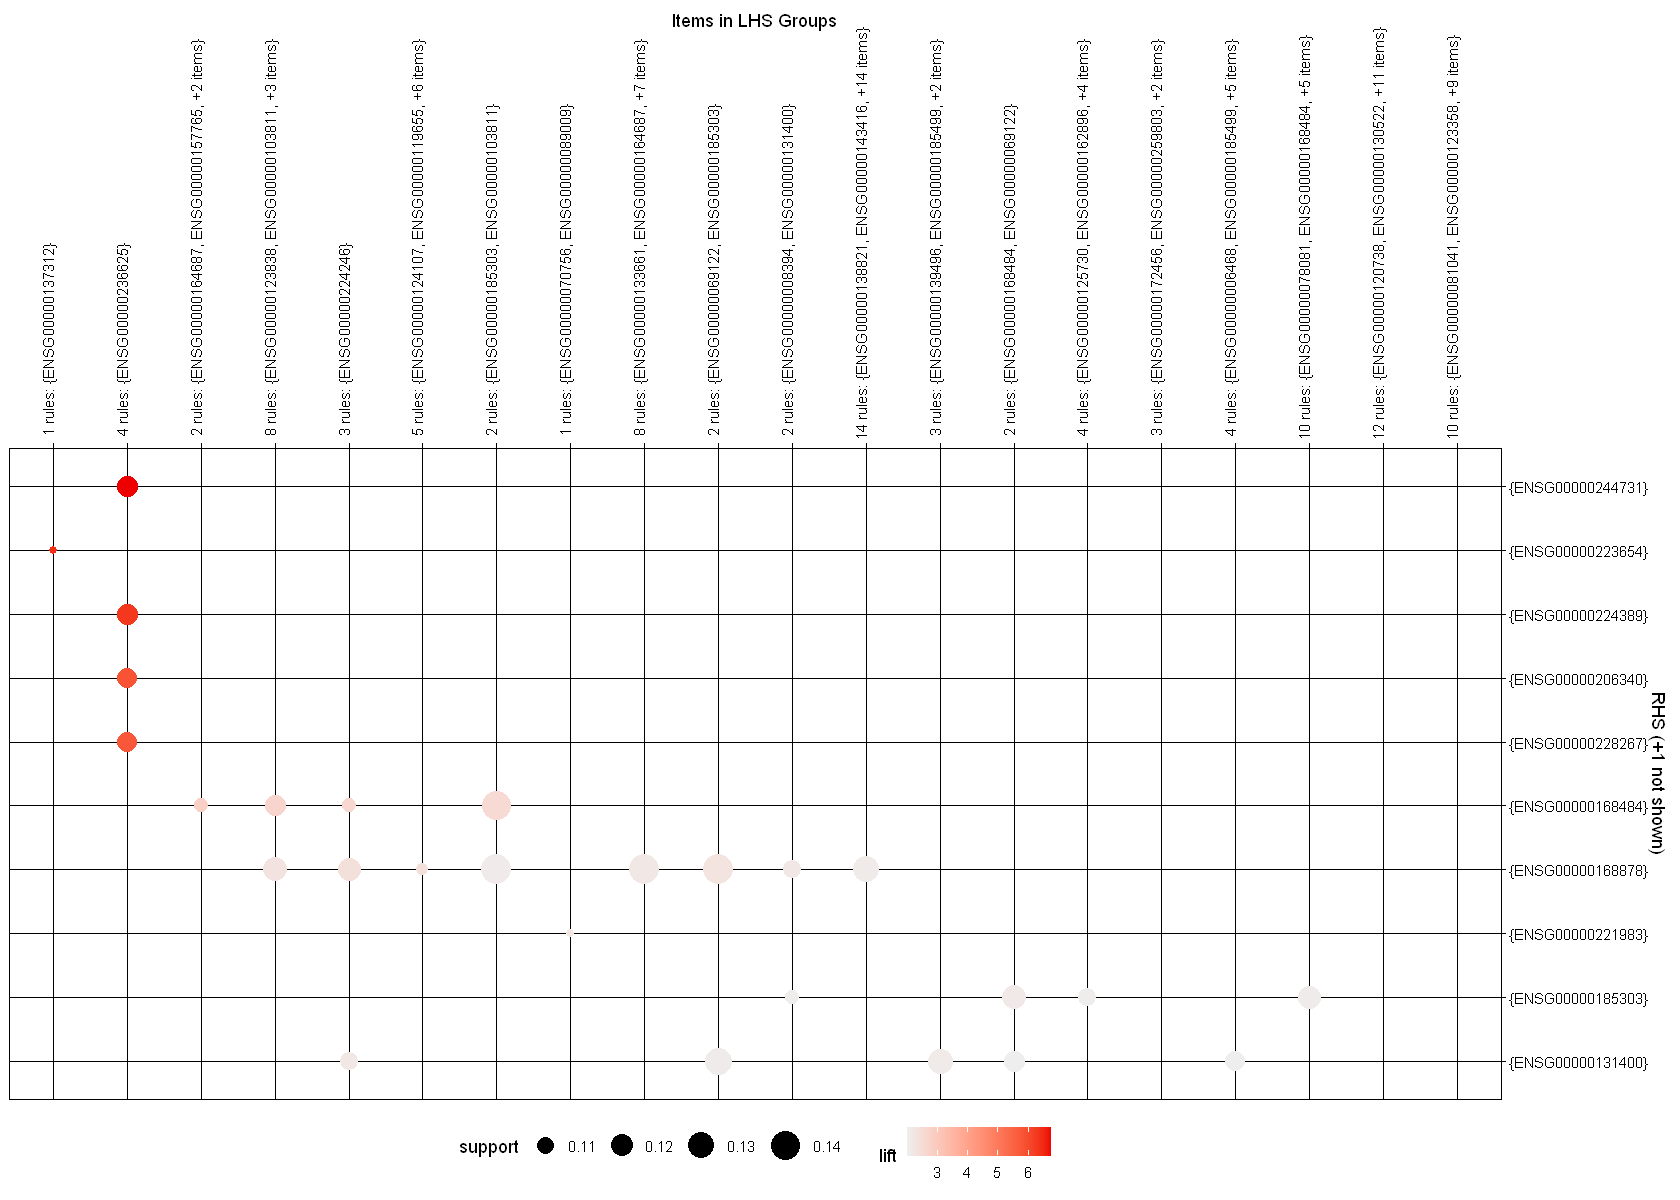

In [47]:
plot(top100Rules, method="grouped")

Exporting top rules

In [48]:
rule_data <- DATAFRAME(top100Rules, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

Extracting genes associated with top n rules

In [49]:
str(rule_data)

'data.frame':	100 obs. of  7 variables:
 $ LHS       : Factor w/ 82 levels "ENSG00000236625",..: 1 1 1 1 2 3 4 5 6 7 ...
 $ RHS       : Factor w/ 11 levels "ENSG00000244731",..: 1 2 3 4 5 5 5 5 5 6 ...
 $ support   : num  0.118 0.118 0.115 0.115 0.104 ...
 $ confidence: num  1 1 0.977 0.977 0.974 ...
 $ coverage  : num  0.118 0.118 0.118 0.118 0.107 ...
 $ lift      : num  6.74 6.28 5.83 5.73 2.5 ...
 $ count     : int  43 43 42 42 38 42 44 38 37 41 ...


In [50]:
rule_data$LHS

[1] ENSG00000236625                                
  [2] ENSG00000236625                                
  [3] ENSG00000236625                                
  [4] ENSG00000236625                                
  [5] ENSG00000103811,ENSG00000119655                
  [6] ENSG00000069122,ENSG00000103811                
  [7] ENSG00000224246                                
  [8] ENSG00000124107,ENSG00000185303                
  [9] ENSG00000122852,ENSG00000124107                
 [10] ENSG00000259803                                
 [11] ENSG00000069122,ENSG00000188906                
 [12] ENSG00000124107,ENSG00000131400                
 [13] ENSG00000069122,ENSG00000185303                
 [14] ENSG00000103811,ENSG00000123838                
 [15] ENSG00000069122,ENSG00000123838                
 [16] ENSG00000103811,ENSG00000157765                
 [17] ENSG00000167972,ENSG00000168484                
 [18] ENSG00000119655,ENSG00000133661                
 [19] ENSG00000137312                                
 [20] ENSG00000164687,ENSG00000185303                
 [21] ENSG00000131400,ENSG00000172456                
 [22] ENSG00000131400,ENSG00000198804                
 [23] ENSG00000103811,ENSG00000131400                
 [24] ENSG00000224246                                
 [25] ENSG00000120738,ENSG00000131400                
 [26] ENSG00000069122,ENSG00000122852                
 [27] ENSG00000069122,ENSG00000103811                
 [28] ENSG00000120738,ENSG00000176907                
 [29] ENSG00000123838,ENSG00000185303                
 [30] ENSG00000123838,ENSG00000185303                
 [31] ENSG00000168484                                
 [32] ENSG00000171223,ENSG00000185499                
 [33] ENSG00000103811,ENSG00000167972                
 [34] ENSG00000168484,ENSG00000185499                
 [35] ENSG00000008394,ENSG00000131400                
 [36] ENSG00000103811,ENSG00000133661                
 [37] ENSG00000069122,ENSG00000133661                
 [38] ENSG00000130522,ENSG00000131400                
 [39] ENSG00000185499,ENSG00000198804                
 [40] ENSG00000164687                                
 [41] ENSG00000139496                                
 [42] ENSG00000008394,ENSG00000122852                
 [43] ENSG00000069122,ENSG00000168484                
 [44] ENSG00000167972,ENSG00000168484                
 [45] ENSG00000103811,ENSG00000131400                
 [46] ENSG00000167972,ENSG00000176907                
 [47] ENSG00000131400,ENSG00000170345                
 [48] ENSG00000069122,ENSG00000185303                
 [49] ENSG00000168878,ENSG00000176907                
 [50] ENSG00000133661,ENSG00000237814                
 [51] ENSG00000160888,ENSG00000185499                
 [52] ENSG00000168484,ENSG00000188906                
 [53] ENSG00000133661,ENSG00000176907                
 [54] ENSG00000120738,ENSG00000185499                
 [55] ENSG00000157765,ENSG00000185499                
 [56] ENSG00000008394,ENSG00000185303                
 [57] ENSG00000224246                                
 [58] ENSG00000103811,ENSG00000123838                
 [59] ENSG00000160862                                
 [60] ENSG00000122852,ENSG00000123838                
 [61] ENSG00000119655,ENSG00000131400                
 [62] ENSG00000151491                                
 [63] ENSG00000157765                                
 [64] ENSG00000185303,ENSG00000189377                
 [65] ENSG00000078081,ENSG00000168484                
 [66] ENSG00000168484,ENSG00000176907                
 [67] ENSG00000168484,ENSG00000176907                
 [68] ENSG00000157765,ENSG00000167972                
 [69] ENSG00000123838,ENSG00000133661                
 [70] ENSG00000103811,ENSG00000185303                
 [71] ENSG00000069122,ENSG00000131400                
 [72] ENSG00000006468                                
 [73] ENSG00000081041,ENSG00000176907                
 [74] ENSG00000103811,ENSG00000122852                
 [75] 

In [51]:
rule_data$RHS

[1] ENSG00000244731 ENSG00000224389 ENSG00000206340 ENSG00000228267
  [5] ENSG00000168878 ENSG00000168878 ENSG00000168878 ENSG00000168878
  [9] ENSG00000168878 ENSG00000122852 ENSG00000168878 ENSG00000168878
 [13] ENSG00000168878 ENSG00000168878 ENSG00000168878 ENSG00000168484
 [17] ENSG00000185303 ENSG00000168878 ENSG00000223654 ENSG00000168484
 [21] ENSG00000122852 ENSG00000122852 ENSG00000168878 ENSG00000131400
 [25] ENSG00000122852 ENSG00000168878 ENSG00000168484 ENSG00000122852
 [29] ENSG00000168484 ENSG00000168878 ENSG00000168878 ENSG00000122852
 [33] ENSG00000122852 ENSG00000131400 ENSG00000168878 ENSG00000168878
 [37] ENSG00000168878 ENSG00000122852 ENSG00000122852 ENSG00000168878
 [41] ENSG00000131400 ENSG00000168878 ENSG00000185303 ENSG00000122852
 [45] ENSG00000168484 ENSG00000122852 ENSG00000122852 ENSG00000131400
 [49] ENSG00000122852 ENSG00000168878 ENSG00000122852 ENSG00000185303
 [53] ENSG00000122852 ENSG00000122852 ENSG00000131400 ENSG00000168878
 [57] ENSG00000168484 ENSG00000168484 ENSG00000168878 ENSG00000168878
 [61] ENSG00000122852 ENSG00000168878 ENSG00000168878 ENSG00000168878
 [65] ENSG00000185303 ENSG00000185303 ENSG00000122852 ENSG00000122852
 [69] ENSG00000168878 ENSG00000168878 ENSG00000168878 ENSG00000131400
 [73] ENSG00000122852 ENSG00000168878 ENSG00000168878 ENSG00000168878
 [77] ENSG00000168878 ENSG00000122852 ENSG00000185303 ENSG00000122852
 [81] ENSG00000185303 ENSG00000185303 ENSG00000131400 ENSG00000122852
 [85] ENSG00000122852 ENSG00000185303 ENSG00000131400 ENSG00000122852
 [89] ENSG00000185303 ENSG00000122852 ENSG00000131400 ENSG00000221983
 [93] ENSG00000185303 ENSG00000131400 ENSG00000122852 ENSG00000122852
 [97] ENSG00000168484 ENSG00000168878 ENSG00000122852 ENSG00000122852
11 Levels: ENSG00000244731 ENSG00000224389 ENSG00000206340 ... ENSG00000221983

In [52]:
# function to find top 5 hub genes from LHS and RHS
findHubs <- function(rule_df)
{
    genes_LHS <- list()
    for(i in strsplit(unlist(lapply(rule_data$LHS, paste, collapse = " ")),','))
    {
        for(j in 1:length(i))
        {
            genes_LHS <- append(genes_LHS, i[j])        
        }
    }
    genes_RHS <- list()
    for(i in strsplit(unlist(lapply(rule_data$RHS, paste, collapse = " ")),','))
    {
        for(j in 1:length(i))
        {
            genes_RHS <- append(genes_RHS, i[j])        
        }
    }
    HubGenes <- unlist(list(names(sort(table(unlist(genes_LHS)),decreasing=TRUE)[1:5]),names(sort(table(unlist(genes_RHS)),decreasing=TRUE)[1:5])))
    return(HubGenes)
}

In [53]:
HubGenes <- findHubs(rule_data)

In [54]:
HubGenes

[1] "ENSG00000131400" "ENSG00000103811" "ENSG00000069122" "ENSG00000185303"
 [5] "ENSG00000168484" "ENSG00000168878" "ENSG00000122852" "ENSG00000185303"
 [9] "ENSG00000131400" "ENSG00000168484"

In [55]:
#write.csv(HubGenes, 'D:/Research/cellTypeSpecificAssociations_v2/Results/E-GEOD-130148/HubGenes.csv')

# Preparing gene list for pathway enrichment analysis of hub nodes in the network

# ENSG00000131400 (NAPSA)

Genes driving ENSG00000131400 (NAPSA)

In [56]:
ENSG00000131400.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="ENSG00000131400"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.09s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [32 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [57]:
subset.rules <- which(colSums(is.subset(ENSG00000131400.association.rules, ENSG00000131400.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 16

In [58]:
if (length(subset.rules) > 0)
{
    ENSG00000131400.subRules <- ENSG00000131400.association.rules[-subset.rules] # remove subset rules
    print(ENSG00000131400.subRules)
} else
{
    ENSG00000131400.subRules <- ENSG00000131400.association.rules
    print("No redundant rule")
}

set of 16 rules 


Filtering rules by lift

In [59]:
filteredRules <- ENSG00000131400.subRules[quality(ENSG00000131400.subRules)$lift > 1]
filteredRules

set of 16 rules 

In [60]:
#Sorting rules by lift
ENSG00000131400.top.rules.RHS <- sort(filteredRules, by = "lift")

In [61]:
inspect(ENSG00000131400.top.rules.RHS)

     lhs                   rhs                 support confidence  coverage     lift count
[1]  {ENSG00000224246}  => {ENSG00000131400} 0.1126374  0.8723404 0.1291209 2.174876    41
[2]  {ENSG00000168484,                                                                    
      ENSG00000185499}  => {ENSG00000131400} 0.1291209  0.8545455 0.1510989 2.130511    47
[3]  {ENSG00000139496}  => {ENSG00000131400} 0.1098901  0.8510638 0.1291209 2.121830    40
[4]  {ENSG00000069122,                                                                    
      ENSG00000185303}  => {ENSG00000131400} 0.1318681  0.8421053 0.1565934 2.099495    48
[5]  {ENSG00000133661,                                                                    
      ENSG00000168484,                                                                    
      ENSG00000185303}  => {ENSG00000131400} 0.1153846  0.8400000 0.1373626 2.094247    42
[6]  {ENSG00000157765,                                                                    

Genes driven by ENSG00000131400 (NAPSA)

In [62]:
ENSG00000131400.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="ENSG00000131400", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [63]:
#subset.rules <- which(colSums(is.subset(ENSG00000131400.association.rules, ENSG00000131400.association.rules)) > 1) # get subset rules in vector
#length(subset.rules)

In [65]:
#if (length(subset.rules) > 0)
#{
#    ENSG00000131400.subRules <- ENSG00000131400.association.rules[-subset.rules] # remove subset rules
#    print(ENSG00000131400.subRules)
#} else
#{
#    ENSG00000131400.subRules <- ENSG00000131400.association.rules
#    print("No redundant rule")
#}

Filtering rules by lift

In [66]:
#filteredRules <- ENSG00000131400.subRules[quality(ENSG00000131400.subRules)$lift > 1]
#filteredRules

In [67]:
#Sorting rules by lift
#ENSG00000131400.top.rules.LHS <- sort(filteredRules, by = "lift")

In [68]:
#inspect(ENSG00000131400.top.rules.LHS)

Preparing gene list

In [69]:
#rules_data_lhs <- DATAFRAME(ENSG00000131400.top.rules.LHS, 
#                       separate = TRUE, 
#                       setStart = '', 
#                       itemSep = ',', 
#                       setEnd = '')

In [70]:
rules_data_rhs <- DATAFRAME(ENSG00000131400.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [71]:
genesDriving.ENSG00000131400 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
#genesDrivenBy.ENSG00000131400 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
#ENSG00000131400.neighbors <- union(genesDriving.ENSG00000131400, genesDriving.ENSG00000131400)

In [72]:
ENSG00000131400.neighbors <- genesDriving.ENSG00000131400

In [73]:
gene.list.ENSG00000131400 <- list(c('ENSG00000131400', ENSG00000131400.neighbors))
gene.list.ENSG00000131400

[[1]]
 [1] "ENSG00000131400" "ENSG00000224246" "ENSG00000168484" "ENSG00000185499"
 [5] "ENSG00000139496" "ENSG00000069122" "ENSG00000185303" "ENSG00000133661"
 [9] "ENSG00000168484" "ENSG00000185303" "ENSG00000157765" "ENSG00000185499"
[13] "ENSG00000078081" "ENSG00000122852" "ENSG00000185303" "ENSG00000006468"
[17] "ENSG00000122852" "ENSG00000256612" "ENSG00000122852" "ENSG00000167972"
[21] "ENSG00000185499" "ENSG00000122852" "ENSG00000138821" "ENSG00000069122"
[25] "ENSG00000157765" "ENSG00000069122" "ENSG00000168484" "ENSG00000133661"
[29] "ENSG00000185499" "ENSG00000122852" "ENSG00000168878" "ENSG00000185499"
[33] "ENSG00000185303" "ENSG00000185499"

In [74]:
#write.csv(gene.list.ENSG00000131400, 'D:/Research/cellTypeSpecificAssociations_v2/Results/E-GEOD-130148/ENSG00000131400_NAPSA/geneList.csv')

# ENSG00000103811 (CTSH)

Genes driving ENSG00000103811 (CTSH)

In [75]:
ENSG00000103811.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="ENSG00000103811"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.09s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Genes driven by ENSG00000103811 (CTSH)

In [76]:
ENSG00000103811.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="ENSG00000103811",default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


# ENSG00000069122 (ADGRF5)

Genes driving ENSG00000069122 (ADGRF5)

In [77]:
ENSG00000069122.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="ENSG00000069122"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.09s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Genes driven by ENSG00000069122 (ADGRF5)

In [78]:
ENSG00000069122.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="ENSG00000069122",default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


# ENSG00000168484 (SFTPC)

Genes driving ENSG00000168484 (SFTPC)

In [79]:
ENSG00000168484.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="ENSG00000168484"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [40 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [80]:
subset.rules <- which(colSums(is.subset(ENSG00000168484.association.rules, ENSG00000168484.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 17

In [81]:
if (length(subset.rules) > 0)
{
    ENSG00000168484.subRules <- ENSG00000168484.association.rules[-subset.rules] # remove subset rules
    print(ENSG00000168484.subRules)
} else
{
    ENSG00000168484.subRules <- ENSG00000168484.association.rules
    print("No redundant rule")
}

set of 23 rules 


Filtering rules by lift

In [82]:
filteredRules <- ENSG00000168484.subRules[quality(ENSG00000168484.subRules)$lift > 1]
filteredRules

set of 23 rules 

In [83]:
#Sorting rules by lift
ENSG00000168484.top.rules.RHS <- sort(filteredRules, by = "lift")

In [84]:
inspect(ENSG00000168484.top.rules.RHS)

     lhs                   rhs                 support confidence  coverage     lift count
[1]  {ENSG00000124107,                                                                    
      ENSG00000185303}  => {ENSG00000168484} 0.1071429  0.9512195 0.1126374 3.010817    39
[2]  {ENSG00000166347,                                                                    
      ENSG00000168878}  => {ENSG00000168484} 0.1153846  0.8936170 0.1291209 2.828492    42
[3]  {ENSG00000103811,                                                                    
      ENSG00000157765}  => {ENSG00000168484} 0.1098901  0.8888889 0.1236264 2.813527    40
[4]  {ENSG00000164687,                                                                    
      ENSG00000185303}  => {ENSG00000168484} 0.1043956  0.8837209 0.1181319 2.797169    38
[5]  {ENSG00000103811,                                                                    
      ENSG00000168878}  => {ENSG00000168484} 0.1648352  0.8695652 0.1895604 2.752363    60

Genes driven by ENSG00000168484 (SFTPC)

In [85]:
ENSG00000168484.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="ENSG00000168484", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [86]:
subset.rules <- which(colSums(is.subset(ENSG00000168484.association.rules, ENSG00000168484.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [87]:
if (length(subset.rules) > 0)
{
    ENSG00000168484.subRules <- ENSG00000168484.association.rules[-subset.rules] # remove subset rules
    print(ENSG00000168484.subRules)
} else
{
    ENSG00000168484.subRules <- ENSG00000168484.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [88]:
filteredRules <- ENSG00000168484.subRules[quality(ENSG00000168484.subRules)$lift > 1]
filteredRules

set of 1 rules 

In [89]:
#Sorting rules by lift
ENSG00000168484.top.rules.LHS <- sort(filteredRules, by = "lift")

In [90]:
inspect(ENSG00000168484.top.rules.LHS)

    lhs                  rhs               support  confidence coverage 
[1] {ENSG00000168484} => {ENSG00000168878} 0.271978 0.8608696  0.3159341
    lift     count
[1] 2.206736 99   


Preparing gene list

In [91]:
rules_data_lhs <- DATAFRAME(ENSG00000168484.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [92]:
rules_data_rhs <- DATAFRAME(ENSG00000168484.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [93]:
genesDriving.ENSG00000168484 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.ENSG00000168484 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
ENSG00000168484.neighbors <- union(genesDriving.ENSG00000168484, genesDriving.ENSG00000168484)

In [94]:
gene.list.ENSG00000168484 <- list(c('ENSG00000168484', ENSG00000131400.neighbors))
gene.list.ENSG00000168484

[[1]]
 [1] "ENSG00000168484" "ENSG00000224246" "ENSG00000168484" "ENSG00000185499"
 [5] "ENSG00000139496" "ENSG00000069122" "ENSG00000185303" "ENSG00000133661"
 [9] "ENSG00000168484" "ENSG00000185303" "ENSG00000157765" "ENSG00000185499"
[13] "ENSG00000078081" "ENSG00000122852" "ENSG00000185303" "ENSG00000006468"
[17] "ENSG00000122852" "ENSG00000256612" "ENSG00000122852" "ENSG00000167972"
[21] "ENSG00000185499" "ENSG00000122852" "ENSG00000138821" "ENSG00000069122"
[25] "ENSG00000157765" "ENSG00000069122" "ENSG00000168484" "ENSG00000133661"
[29] "ENSG00000185499" "ENSG00000122852" "ENSG00000168878" "ENSG00000185499"
[33] "ENSG00000185303" "ENSG00000185499"

In [95]:
#write.csv(gene.list.ENSG00000168484, 'D:/Research/cellTypeSpecificAssociations_v2/Results/E-GEOD-130148/ENSG00000168484_SFTPC/geneList.csv')

# ENSG00000168878 (SFTPB)

Genes driving ENSG00000168878 (SFTPB)

In [96]:
ENSG00000168878.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="ENSG00000168878"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [140 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [97]:
subset.rules <- which(colSums(is.subset(ENSG00000168878.association.rules, ENSG00000168878.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 103

In [98]:
if (length(subset.rules) > 0)
{
    ENSG00000168878.subRules <- ENSG00000168878.association.rules[-subset.rules] # remove subset rules
    print(ENSG00000168878.subRules)
} else
{
    ENSG00000168878.subRules <- ENSG00000168878.association.rules
    print("No redundant rule")
}

set of 37 rules 


Filtering rules by lift

In [99]:
filteredRules <- ENSG00000168878.subRules[quality(ENSG00000168878.subRules)$lift > 1]
filteredRules

set of 37 rules 

In [100]:
#Sorting rules by lift
ENSG00000168878.top.rules.RHS <- sort(filteredRules, by = "lift")

In [101]:
inspect(ENSG00000168878.top.rules.RHS)

     lhs                                   rhs               support  
[1]  {ENSG00000103811, ENSG00000119655} => {ENSG00000168878} 0.1043956
[2]  {ENSG00000069122, ENSG00000103811} => {ENSG00000168878} 0.1153846
[3]  {ENSG00000224246}                  => {ENSG00000168878} 0.1208791
[4]  {ENSG00000124107, ENSG00000185303} => {ENSG00000168878} 0.1043956
[5]  {ENSG00000122852, ENSG00000124107} => {ENSG00000168878} 0.1016484
[6]  {ENSG00000069122, ENSG00000188906} => {ENSG00000168878} 0.1098901
[7]  {ENSG00000124107, ENSG00000131400} => {ENSG00000168878} 0.1071429
[8]  {ENSG00000069122, ENSG00000185303} => {ENSG00000168878} 0.1401099
[9]  {ENSG00000103811, ENSG00000123838} => {ENSG00000168878} 0.1153846
[10] {ENSG00000069122, ENSG00000123838} => {ENSG00000168878} 0.1126374
[11] {ENSG00000119655, ENSG00000133661} => {ENSG00000168878} 0.1071429
[12] {ENSG00000103811, ENSG00000131400} => {ENSG00000168878} 0.1401099
[13] {ENSG00000069122, ENSG00000122852} => {ENSG00000168878} 0.1401099
[14] {

Genes driven by ENSG00000168878 (SFTPB)

In [102]:
ENSG00000168878.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="ENSG00000168878", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.08s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [103]:
#subset.rules <- which(colSums(is.subset(ENSG00000168878.association.rules, ENSG00000168878.association.rules)) > 1) # get subset rules in vector
#length(subset.rules)

In [104]:
#if (length(subset.rules) > 0)
#{
#    ENSG00000168878.subRules <- ENSG00000168878.association.rules[-subset.rules] # remove subset rules
#    print(ENSG00000168878.subRules)
#} else
#{
#    ENSG00000168878.subRules <- ENSG00000168878.association.rules
#    print("No redundant rule")
#}

Filtering rules by lift

In [105]:
#filteredRules <- ENSG00000168878.subRules[quality(ENSG00000168878.subRules)$lift > 1]
#filteredRules

In [106]:
#Sorting rules by lift
#ENSG00000168878.top.rules.LHS <- sort(filteredRules, by = "lift")

In [107]:
#inspect(ENSG00000168878.top.rules.LHS)

Preparing gene list

In [108]:
#rules_data_lhs <- DATAFRAME(ENSG00000168878.top.rules.LHS, 
#                       separate = TRUE, 
#                       setStart = '', 
#                       itemSep = ',', 
#                       setEnd = '')
#

In [109]:
rules_data_rhs <- DATAFRAME(ENSG00000168878.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [110]:
genesDriving.ENSG00000168484 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
#genesDrivenBy.ENSG00000168484 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
#ENSG00000168878.neighbors <- union(genesDriving.ENSG00000168878, genesDriving.ENSG00000168878)

In [111]:
ENSG00000168878.neighbors <- genesDriving.ENSG00000168484

In [112]:
gene.list.ENSG00000168878 <- list(c('ENSG00000168878', ENSG00000168878.neighbors))
gene.list.ENSG00000168878

[[1]]
 [1] "ENSG00000168878" "ENSG00000103811" "ENSG00000119655" "ENSG00000069122"
 [5] "ENSG00000103811" "ENSG00000224246" "ENSG00000124107" "ENSG00000185303"
 [9] "ENSG00000122852" "ENSG00000124107" "ENSG00000069122" "ENSG00000188906"
[13] "ENSG00000124107" "ENSG00000131400" "ENSG00000069122" "ENSG00000185303"
[17] "ENSG00000103811" "ENSG00000123838" "ENSG00000069122" "ENSG00000123838"
[21] "ENSG00000119655" "ENSG00000133661" "ENSG00000103811" "ENSG00000131400"
[25] "ENSG00000069122" "ENSG00000122852" "ENSG00000123838" "ENSG00000185303"
[29] "ENSG00000168484" "ENSG00000008394" "ENSG00000131400" "ENSG00000103811"
[33] "ENSG00000133661" "ENSG00000069122" "ENSG00000133661" "ENSG00000164687"
[37] "ENSG00000008394" "ENSG00000122852" "ENSG00000133661" "ENSG00000237814"
[41] "ENSG00000008394" "ENSG00000185303" "ENSG00000160862" "ENSG00000122852"
[45] "ENSG00000123838" "ENSG00000151491" "ENSG00000157765" "ENSG00000185303"
[49] "ENSG00000189377" "ENSG00000123838" "ENSG00000133661" "ENSG00000103811"
[53] "ENSG00000185303" "ENSG00000069122" "ENSG00000131400" "ENSG00000103811"
[57] "ENSG00000122852" "ENSG00000122852" "ENSG00000143416" "ENSG00000123838"
[61] "ENSG00000131400" "ENSG00000078081" "ENSG00000185303" "ENSG00000138821"
[65] "ENSG00000185303" "ENSG00000131400" "ENSG00000237814" "ENSG00000185303"
[69] "ENSG00000237814"

In [113]:
#write.csv(gene.list.ENSG00000168878, 'D:/Research/cellTypeSpecificAssociations_v2/Results/E-GEOD-130148/ENSG00000168878_SFTPB/geneList.csv')

# ENSG00000122852 (SFTPA1)

Genes driving ENSG00000122852 (SFTPA1)

In [114]:
ENSG00000122852.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="ENSG00000122852"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.09s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [168 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [115]:
subset.rules <- which(colSums(is.subset(ENSG00000122852.association.rules, ENSG00000122852.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 131

In [116]:
if (length(subset.rules) > 0)
{
    ENSG00000122852.subRules <- ENSG00000122852.association.rules[-subset.rules] # remove subset rules
    print(ENSG00000122852.subRules)
} else
{
    ENSG00000122852.subRules <- ENSG00000122852.association.rules
    print("No redundant rule")
}

set of 37 rules 


Filtering rules by lift

In [117]:
filteredRules <- ENSG00000122852.subRules[quality(ENSG00000122852.subRules)$lift > 1]
filteredRules

set of 37 rules 

In [118]:
#Sorting rules by lift
ENSG00000122852.top.rules.RHS <- sort(filteredRules, by = "lift")

In [119]:
inspect(ENSG00000122852.top.rules.RHS)

     lhs                   rhs                 support confidence  coverage     lift count
[1]  {ENSG00000259803}  => {ENSG00000122852} 0.1126374  0.9111111 0.1236264 2.072778    41
[2]  {ENSG00000185303}  => {ENSG00000122852} 0.3516484  0.8888889 0.3956044 2.022222   128
[3]  {ENSG00000131400,                                                                    
      ENSG00000172456}  => {ENSG00000122852} 0.1043956  0.8837209 0.1181319 2.010465    38
[4]  {ENSG00000131400,                                                                    
      ENSG00000198804}  => {ENSG00000122852} 0.1043956  0.8837209 0.1181319 2.010465    38
[5]  {ENSG00000131400,                                                                    
      ENSG00000256612}  => {ENSG00000122852} 0.1016484  0.8809524 0.1153846 2.004167    37
[6]  {ENSG00000120738,                                                                    
      ENSG00000131400}  => {ENSG00000122852} 0.1098901  0.8695652 0.1263736 1.978261    40

Genes driven by ENSG00000122852 (SFTPA1)

In [120]:
ENSG00000122852.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="ENSG00000122852", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 36 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[17622 item(s), 364 transaction(s)] done [0.09s].
sorting and recoding items ... [1147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [121]:
subset.rules <- which(colSums(is.subset(ENSG00000122852.association.rules, ENSG00000122852.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [122]:
if (length(subset.rules) > 0)
{
    ENSG00000122852.subRules <- ENSG00000122852.association.rules[-subset.rules] # remove subset rules
    print(ENSG00000122852.subRules)
} else
{
    ENSG00000122852.subRules <- ENSG00000122852.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [123]:
filteredRules <- ENSG00000122852.subRules[quality(ENSG00000122852.subRules)$lift > 1]
filteredRules

set of 1 rules 

In [124]:
#Sorting rules by lift
ENSG00000122852.top.rules.LHS <- sort(filteredRules, by = "lift")

In [125]:
inspect(ENSG00000122852.top.rules.LHS)

    lhs                  rhs               support   confidence coverage 
[1] {ENSG00000122852} => {ENSG00000185303} 0.3516484 0.8        0.4395604
    lift     count
[1] 2.022222 128  


Preparing gene list

In [126]:
rules_data_lhs <- DATAFRAME(ENSG00000122852.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [127]:
rules_data_rhs <- DATAFRAME(ENSG00000122852.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [128]:
genesDriving.ENSG00000122852 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.ENSG00000122852 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
ENSG00000122852.neighbors <- union(genesDriving.ENSG00000122852, genesDriving.ENSG00000122852)

In [129]:
gene.list.ENSG00000122852 <- list(c('ENSG00000122852', ENSG00000122852.neighbors))
gene.list.ENSG00000122852

[[1]]
 [1] "ENSG00000122852" "ENSG00000259803" "ENSG00000185303" "ENSG00000131400"
 [5] "ENSG00000172456" "ENSG00000198804" "ENSG00000256612" "ENSG00000120738"
 [9] "ENSG00000176907" "ENSG00000171223" "ENSG00000185499" "ENSG00000103811"
[13] "ENSG00000167972" "ENSG00000130522" "ENSG00000168484" "ENSG00000170345"
[17] "ENSG00000168878" "ENSG00000160888" "ENSG00000133661" "ENSG00000119655"
[21] "ENSG00000157765" "ENSG00000081041" "ENSG00000123358" "ENSG00000188906"
[25] "ENSG00000275079" "ENSG00000138821" "ENSG00000153395" "ENSG00000078081"
[29] "ENSG00000069122"

In [130]:
#write.csv(gene.list.ENSG00000122852, 'D:/Research/cellTypeSpecificAssociations_v2/Results/E-GEOD-130148/ENSG00000122852_SFTPA1/geneList.csv')